In [1]:
import numpy as np

path = '../bayes_implicit_solvent/tests/sampled_radii.npy'

In [2]:
radii = np.load(path)

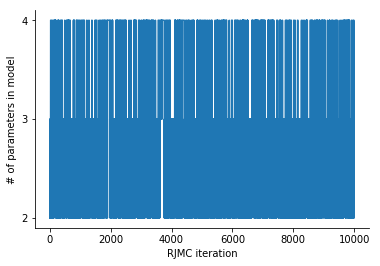

In [32]:
import matplotlib.pyplot as plt
from bayes_implicit_solvent.utils import remove_top_right_spines
%matplotlib inline

lengths = [len(r) for r in radii]

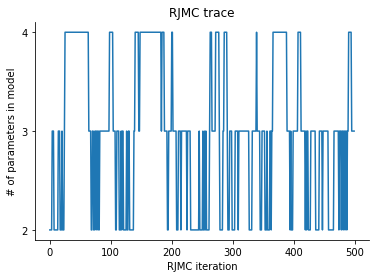

In [48]:
ax = plt.subplot(111)

plt.plot(lengths[:500])
plt.xlabel('RJMC iteration')
plt.ylabel('# of parameters in model')
plt.yticks(sorted(list(set(lengths))));

remove_top_right_spines(ax)

plt.title('RJMC trace')

plt.savefig('0-rjmc-trace.png', dpi=300)

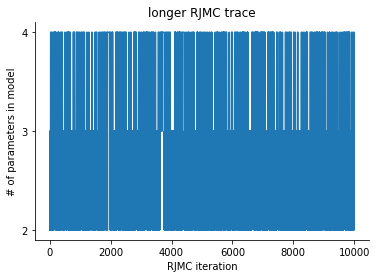

In [49]:
ax = plt.subplot(111)
plt.plot(lengths)
plt.xlabel('RJMC iteration')
plt.ylabel('# of parameters in model')
plt.yticks(sorted(list(set(lengths))));
remove_top_right_spines(ax)


plt.title('longer RJMC trace')

plt.savefig('1-long-rjmc-trace.png', dpi=300)

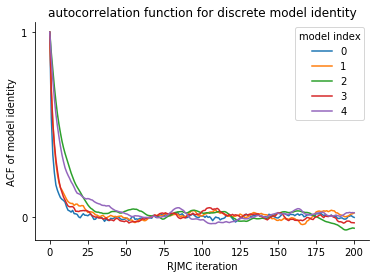

In [51]:
from statsmodels.tsa.stattools import acf
path = '../bayes_implicit_solvent/tests/discrete_model_traj.npy'
dtraj = np.load(path)

ax = plt.subplot(111)
for i in sorted(list(set(dtraj))):
    plt.plot(acf(dtraj==i, nlags=200), label=str(i))
remove_top_right_spines(ax)
plt.xlabel('RJMC iteration')
plt.ylabel('ACF of model identity')
plt.yticks([0,1])
plt.legend(title='model index')

plt.title('autocorrelation function for discrete model identity')

plt.savefig('2-rjmc-acf.png', dpi=300)

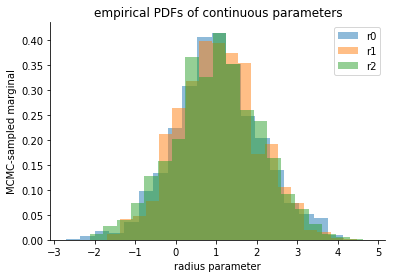

In [44]:
hist_kwargs = {'density': True, 'alpha': 0.5, 'bins': 20}

ax = plt.subplot(111)
plt.hist([r[0] for r in radii], label='r0', **hist_kwargs);
plt.hist([r[1] for r in radii], label='r1',**hist_kwargs);
plt.hist([r[2] for r in radii if len(r) == 3],label='r2', **hist_kwargs);
plt.xlabel('radius parameter')
plt.ylabel('MCMC-sampled marginal')
plt.legend()

remove_top_right_spines(ax)

plt.title('empirical PDFs of continuous parameters')


plt.savefig('3-rjmc-pdfs.png', dpi=300)

In [7]:
i = 0
rvs = np.array([r[i] for r in radii if len(r) > i])
len(rvs)

10001

In [8]:
from scipy.stats import kstest

# check that we're not producing mean-zero Gaussian values
kstest_result = kstest(rvs[::20], 'norm')
pvalue_should_be_under_threshold = kstest_result.pvalue
kstest_result

KstestResult(statistic=0.4033718610606288, pvalue=0.0)

In [9]:
threshold = 0.001

In [10]:
assert(pvalue_should_be_under_threshold < threshold)

In [11]:
# check that we're producing mean 1.0 Gaussian values
from scipy.stats import norm
kstest_result = kstest(rvs[::20], norm(loc=1.0).cdf)
pvalue_should_be_over_threshold = kstest_result.pvalue
kstest_result

KstestResult(statistic=0.030090593621755257, pvalue=0.7547448617476038)

In [12]:
assert(pvalue_should_be_over_threshold > threshold)

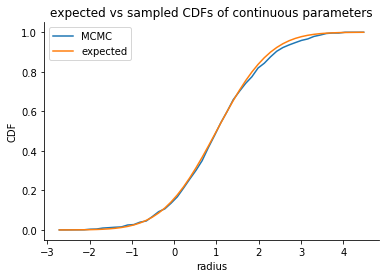

In [52]:
x = np.linspace(min(rvs), max(rvs))
y_expected = norm(loc=1.0).cdf(x)
y_empirical = np.array([np.mean(rvs <= x_) for x_ in x])

ax = plt.subplot(111)
plt.plot(x, y_empirical, label='MCMC')
plt.plot(x, y_expected, label='expected')
plt.xlabel('radius')
plt.ylabel('CDF')
plt.legend()

remove_top_right_spines(ax)

plt.title('expected vs sampled CDFs of continuous parameters')


plt.savefig('4-rjmc-cdfs.png', dpi=300)

In [14]:
lengths = np.array(lengths)


In [15]:
expected_length_distribution = np.array([0.2, 0.4, 0.4])
expected_length_distribution  * (len(lengths[::20]))

array([100.2, 200.4, 200.4])

In [16]:
from scipy.stats import chisquare
observed_distribution = [np.sum(lengths[::20]==2), np.sum(lengths[::20]==3), np.sum(lengths[::20]==4)]
chi2_result = chisquare(observed_distribution, expected_length_distribution)
print(chi2_result)
#assert(chi2_result.pvalue > threshold)

Power_divergenceResult(statistic=282151.5, pvalue=0.0)


In [17]:
observed_distribution

[144, 242, 115]

In [18]:
expected_length_distribution

array([0.2, 0.4, 0.4])

In [19]:
observed_distribution

[144, 242, 115]

In [20]:
help(chisquare)

Help on function chisquare in module scipy.stats.stats:

chisquare(f_obs, f_exp=None, ddof=0, axis=0)
    Calculate a one-way chi square test.
    
    The chi square test tests the null hypothesis that the categorical data
    has the given frequencies.
    
    Parameters
    ----------
    f_obs : array_like
        Observed frequencies in each category.
    f_exp : array_like, optional
        Expected frequencies in each category.  By default the categories are
        assumed to be equally likely.
    ddof : int, optional
        "Delta degrees of freedom": adjustment to the degrees of freedom
        for the p-value.  The p-value is computed using a chi-squared
        distribution with ``k - 1 - ddof`` degrees of freedom, where `k`
        is the number of observed frequencies.  The default value of `ddof`
        is 0.
    axis : int or None, optional
        The axis of the broadcast result of `f_obs` and `f_exp` along which to
        apply the test.  If axis is None, all va

In [21]:
path = '../bayes_implicit_solvent/tests/discrete_model_traj.npy'
dtraj = np.load(path)

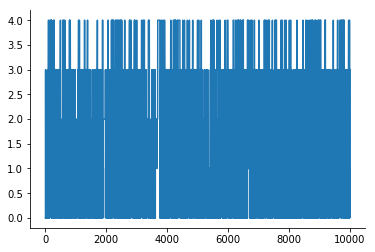

In [22]:
ax = plt.subplot(111)
plt.plot(dtraj)
remove_top_right_spines(ax)

In [23]:
np.histogram(dtraj)

(array([2628,    0, 2532,    0,    0, 1322,    0, 2432,    0, 1087]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]))

In [24]:
np.bincount(dtraj)

array([2628, 2532, 1322, 2432, 1087])

In [25]:
chisquare(np.bincount(dtraj[::100]))

Power_divergenceResult(statistic=25.980198019801982, pvalue=3.1936878692086175e-05)

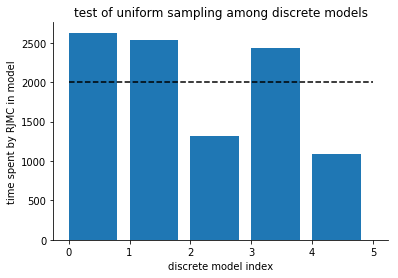

In [46]:
n_states = len(set(dtraj))
ax = plt.subplot(111)
plt.bar(np.arange(n_states), np.bincount(dtraj), align='edge')
plt.hlines(len(dtraj) / n_states, 0, n_states, linestyles='--')
plt.xlabel('discrete model index')
plt.ylabel('time spent by RJMC in model')
remove_top_right_spines(ax)
plt.title('test of uniform sampling among discrete models')


plt.savefig('5-rjmc-model-histogram.png', dpi=300)

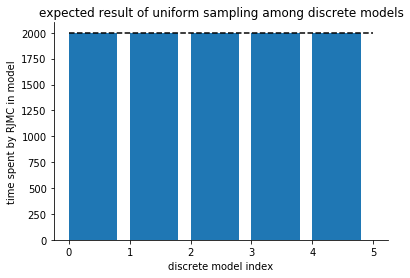

In [53]:
n_states = len(set(dtraj))
ax = plt.subplot(111)
plt.bar(np.arange(n_states), np.ones(n_states) * 2000, align='edge')
plt.hlines(len(dtraj) / n_states, 0, n_states, linestyles='--')
plt.xlabel('discrete model index')
plt.ylabel('time spent by RJMC in model')
remove_top_right_spines(ax)
plt.title('expected result of uniform sampling among discrete models')


plt.savefig('6-expected-rjmc-model-histogram.png', dpi=300)